In [1]:
%load_ext autoreload

%autoreload 2

import numpy as np
# %matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
from math import sqrt

from ruspy.data.data_reading import data_reading
from ruspy.data.data_processing import data_processing

from ruspy.estimation.estimation import estimate

In [3]:
data_reading()

In [2]:
#Initilize a dictionary with values needed on the way.
np.random.seed(123)
beta = 0.9999
init_dict = {
    'groups': 'group_4',
    'beta': beta,
    'maint_func': 'linear',
    'binsize': 5000,
    'states': 90,
}

In [3]:
repl_data = data_processing(init_dict)
trans_results, cost_results = estimate(init_dict, repl_data)
print(trans_results, cost_results)

     fun: 3140.570557231583
     jac: array([-4291.96844482, -4292.02462769, -4291.81420898])
 message: 'Optimization terminated successfully.'
    nfev: 158
     nit: 26
    njev: 26
  status: 0
 success: True
       x: array([0.39189477, 0.59529015, 0.01281509])       fun: 163.58583895093736
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00015916, -0.00031548])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 36
      nit: 10
   status: 0
  success: True
        x: array([10.0776994 ,  2.29411882])


In [4]:
p_ml = trans_results['x']

In [5]:
def get_x(p, l):
    return l - p[0] * sqrt( 1 + l ** 2 / 4) - 0.5 * l * p[1]

In [6]:
n = 4292
dim = 3
cov = np.zeros(shape=(dim, dim), dtype=float)
for i in range(dim):
    for j in range(dim):
        if i==j:
            cov[i, i] = p_ml[i] * (1 - p_ml[i])
        else:
            cov[i, j] = p_ml[i] * p_ml[j]
cov = cov / n
for i in range(dim):
    print(sqrt(cov[i, i]))

0.007451509273374932
0.007492148550276416
0.001716841332808422


In [7]:
# Specify simplex
l_simp = sqrt(4 / 3)

In [8]:
points = 1000000
draws_y = []
draws_x = []
draws_heat = []
for i in range(points):
    draw = list(np.random.multinomial(n, p_ml))
    probs = np.array(draw) / n
    draws_y += [probs[1]]
    draws_x += [get_x(probs, l_simp)]

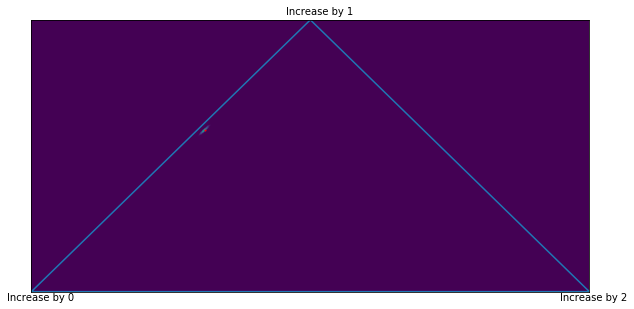

In [9]:
# Create triangulation.
x = np.array([0, 0.5 * l_simp, l_simp])
y = np.array([0, 1, 0])
triang = mtri.Triangulation(x, y)

# Set up the figure
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.text(-0.05, -0.03, "Increase by 0")
ax.text(l_simp - 0.06, -0.03, "Increase by 2")
ax.text(0.5 * l_simp - 0.05, 1.02, "Increase by 1")
ax.plot([get_x(p_ml, l_simp)], [p_ml[1]], marker='o', markersize=1, color="red")
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Plot the triangulation.
#axs.tricontourf(triang, z)

# ax.set_title('Probability simplex')
# Plot heatmap
# ax2 = ax.twinx()
ax.hist2d(np.array(draws_x), np.array(draws_y), bins=2000, range=[[0, l_simp], [0, 1]])
ax.triplot(triang)